<a href="https://colab.research.google.com/github/Rp-sushil/yolo_tutorial/blob/main/yolov5_tutorial_aquarium_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12169, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 12169 (delta 0), reused 2 (delta 0), pack-reused 12167
Receiving objects: 100% (12169/12169), 11.93 MiB | 32.41 MiB/s, done.
Resolving deltas: 100% (8427/8427), done.
/content/yolov5
     |████████████████████████████████| 596 kB 7.2 MB/s 
     |████████████████████████████████| 145 kB 8.5 MB/s 
     |████████████████████████████████| 178 kB 65.0 MB/s 
     |████████████████████████████████| 1.1 MB 63.9 MB/s 
     |████████████████████████████████| 67 kB 7.5 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 138 kB 78.0 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1

In [3]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [4]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8hHO411Hospbz29Q3rcr")
project = rf.workspace("vision-gt1mm").project("pascal-voc-2012-rivuz")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Pascal-VOC-2012-1 in yolov5pytorch:: 100%|██████████| 3070/3070 [00:02<00:00, 1188.05it/s]


In [6]:
!python train.py --img 416 --batch 16 --epochs 150 --data /content/datasets/Pascal-VOC-2012-1/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/Pascal-VOC-2012-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-243-g7cef03d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.0

In [7]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source /content/datasets/Pascal-VOC-2012-1/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/Pascal-VOC-2012-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-243-g7cef03d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7029004 parameters, 0 gradients, 15.9 GFLOPs
image 1/63 /content/datasets/Pascal-VOC-2012-1/test/images/IMG_2289_jpeg_jpg.rf.3716babee65d737a1b366f29fbc731f2.jpg: 416x416 2 puffins, Done. (0.010s)
image 2/63 /content/datasets/Pascal-VOC-2012-1/test/images/IMG_2301_jpeg_jpg.rf.4522a4541d43205d9b6586c26691e8ef.jpg: 416x416 22 penguins, Done. (0.010s)
image 3/63 /content/dataset

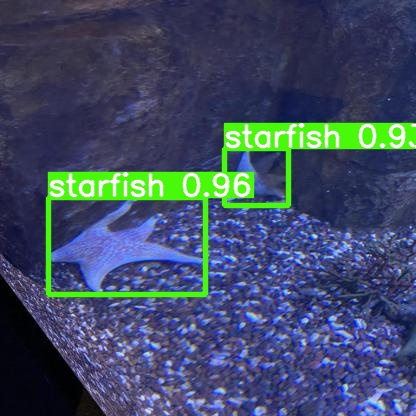

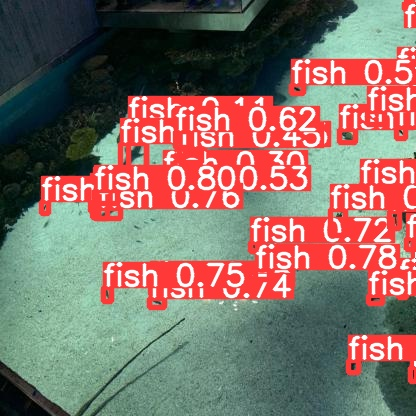

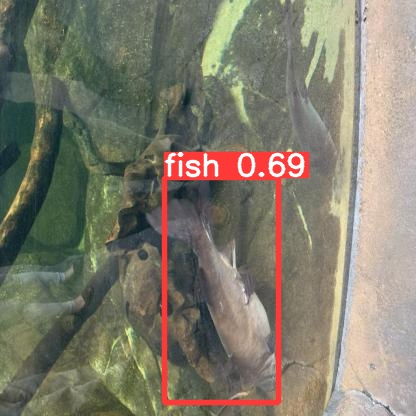

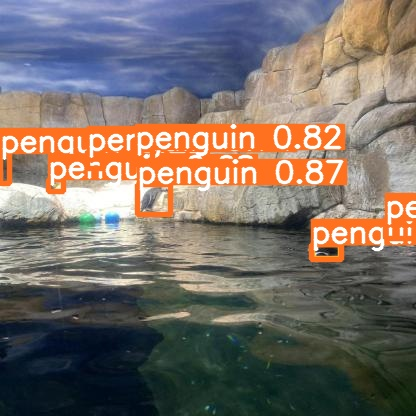

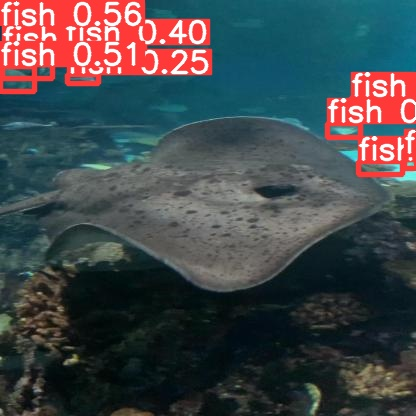

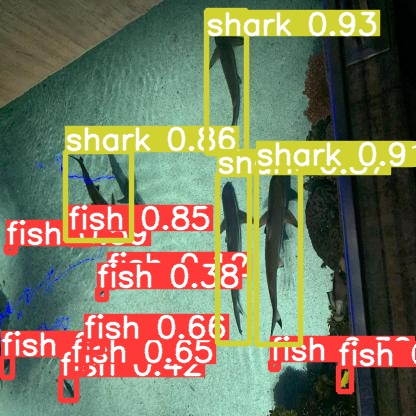

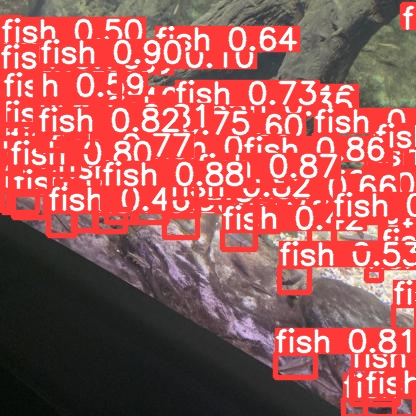

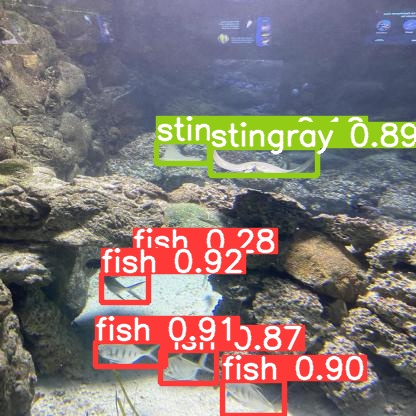

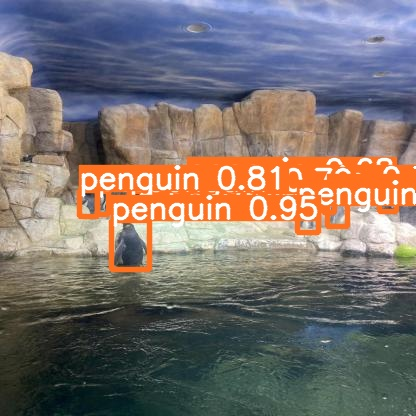

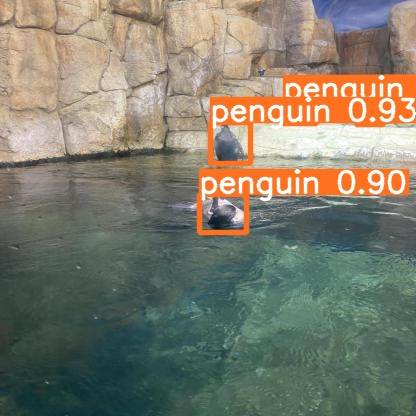

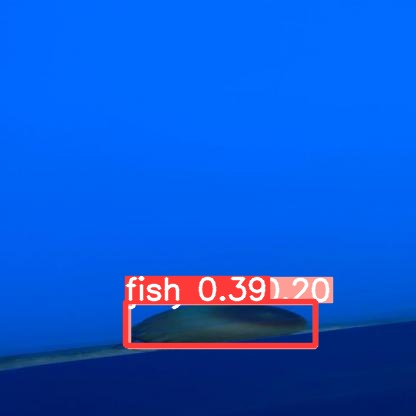

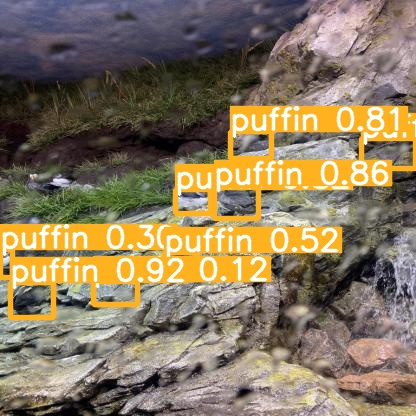

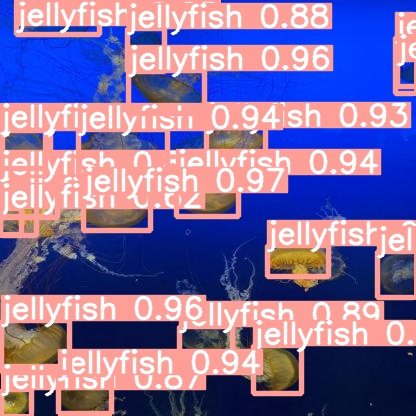

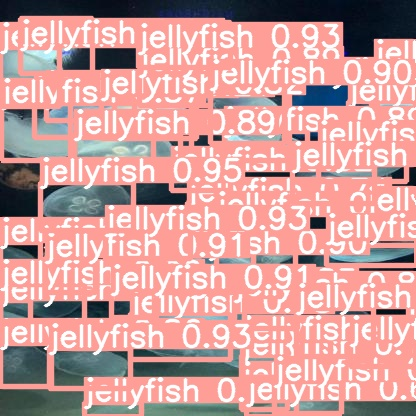

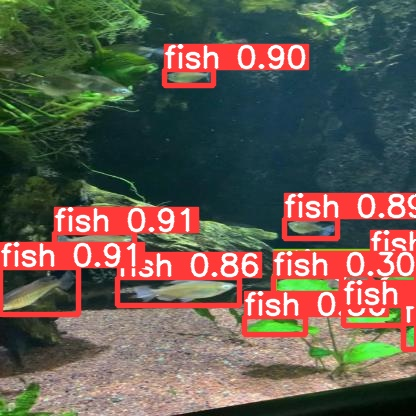

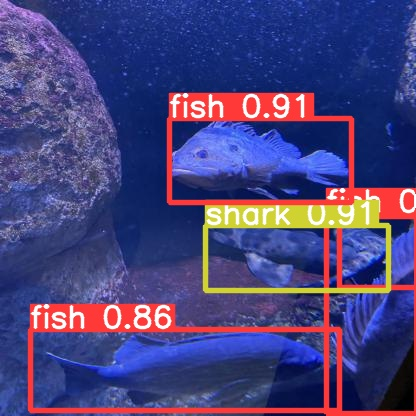

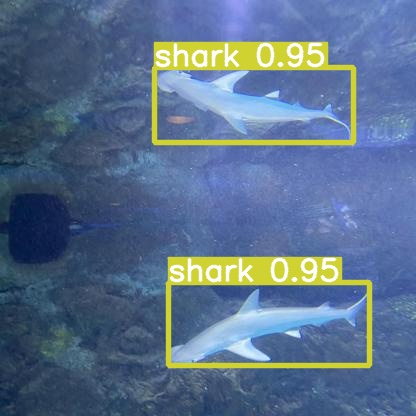

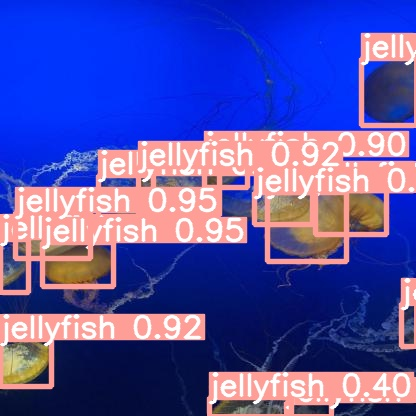

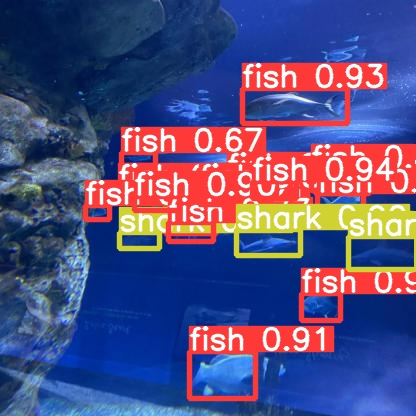

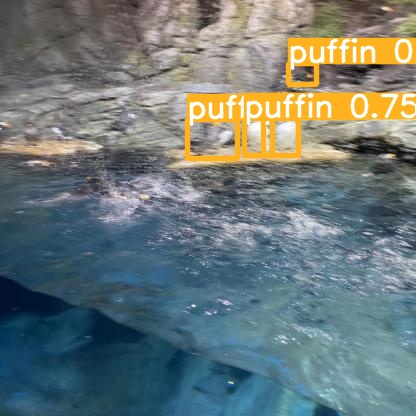

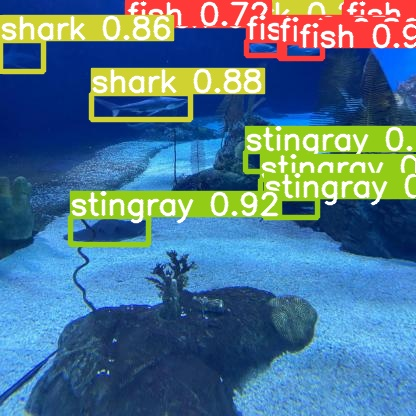

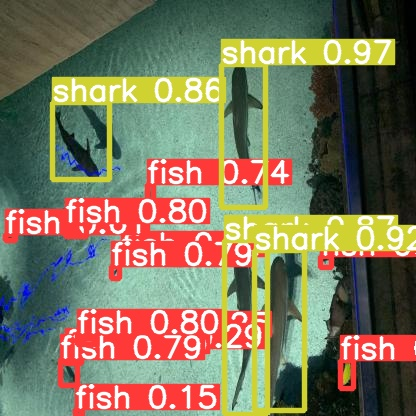

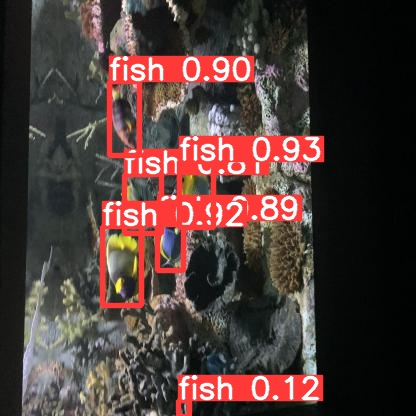

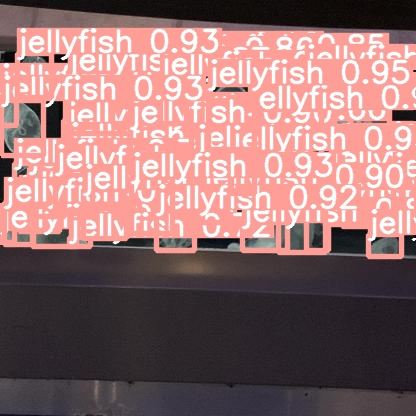

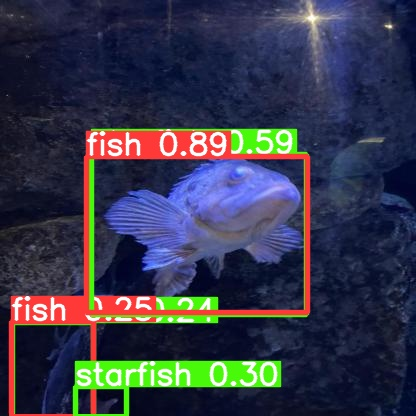

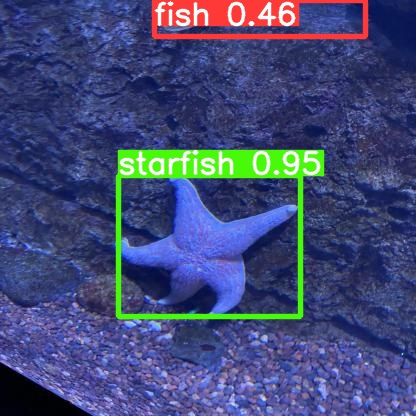

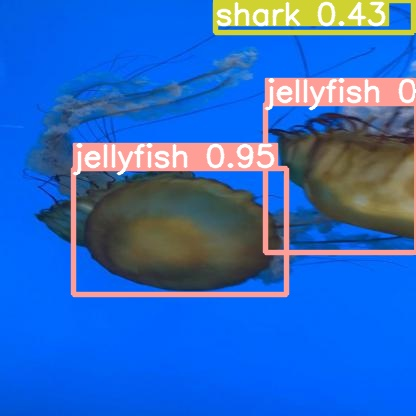

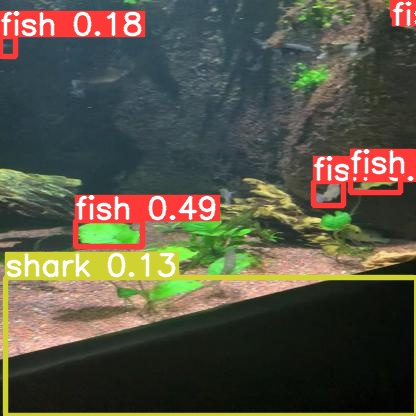

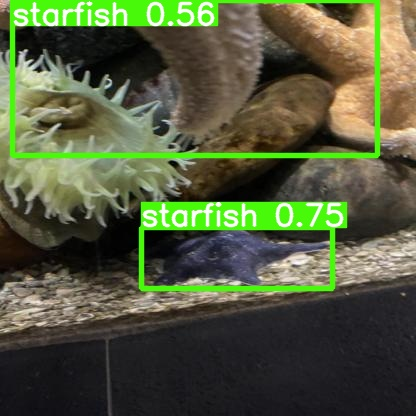

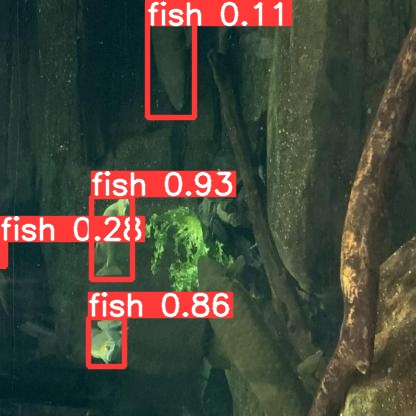

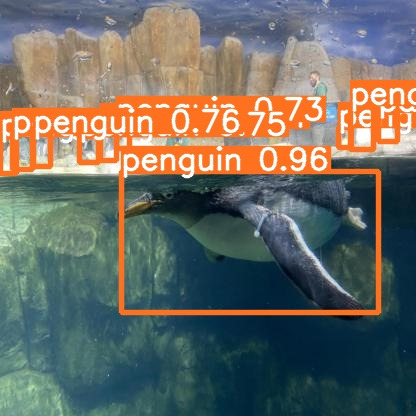

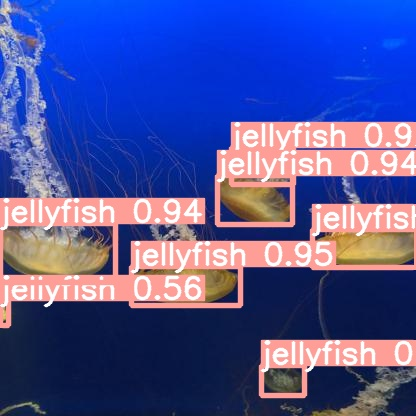

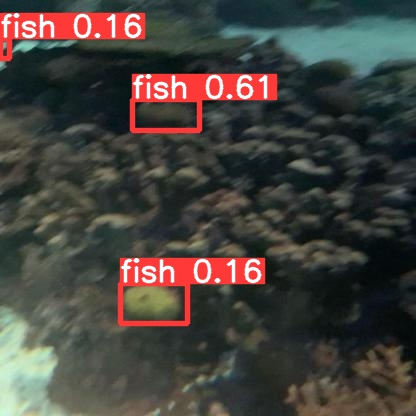

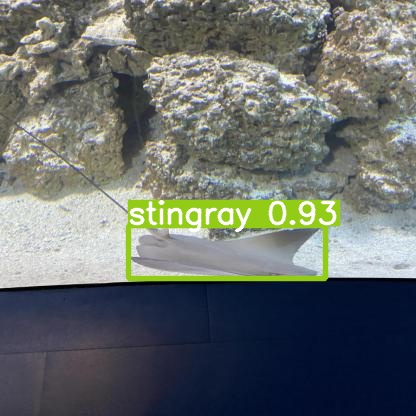

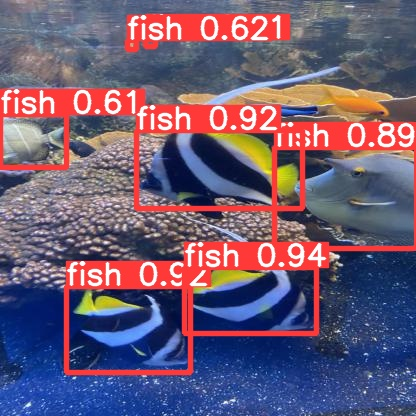

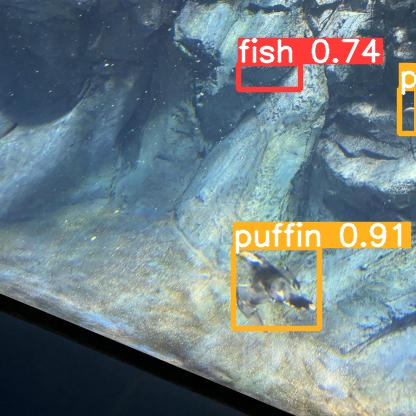

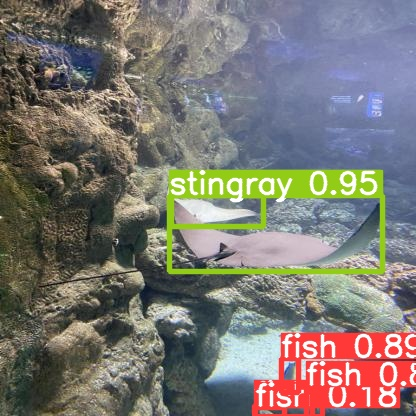

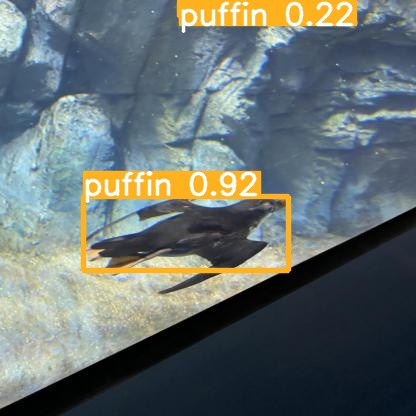

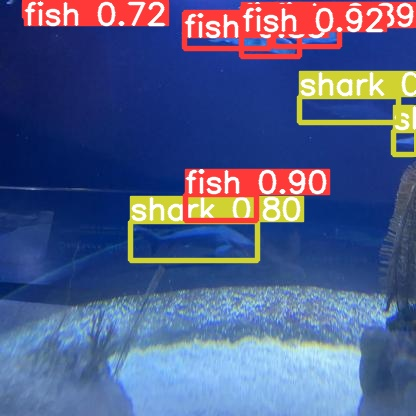

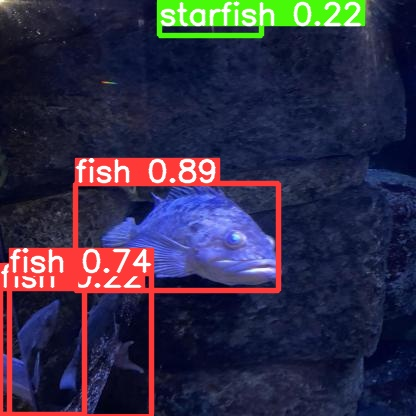

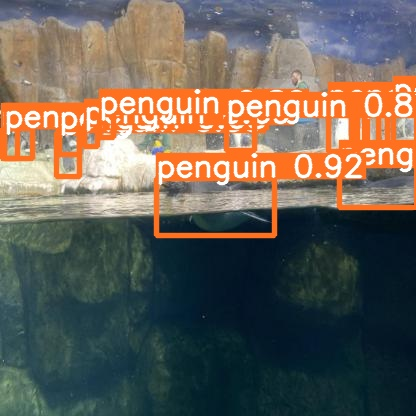

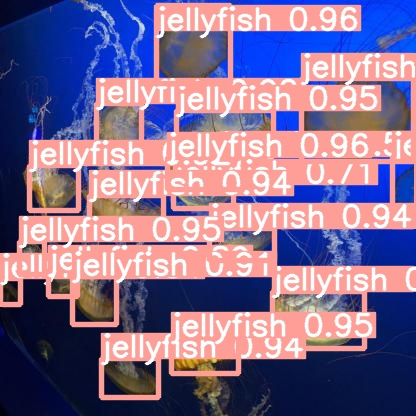

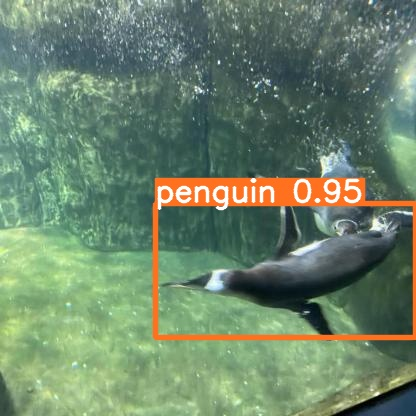

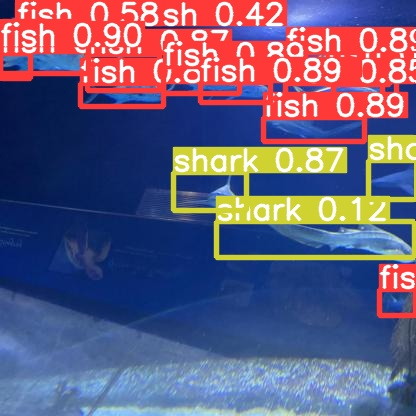

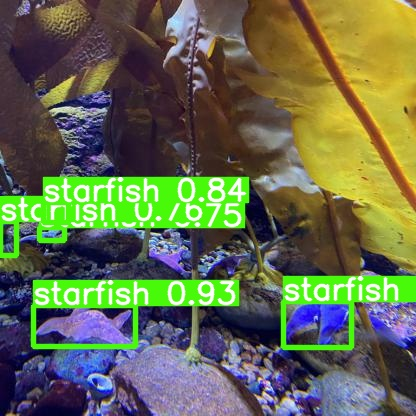

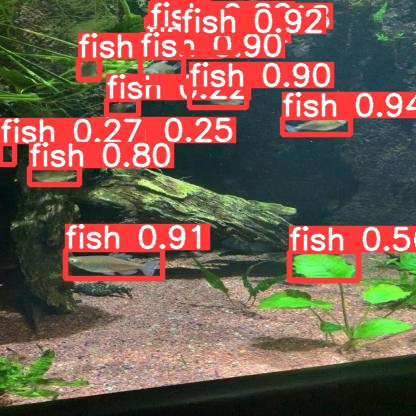

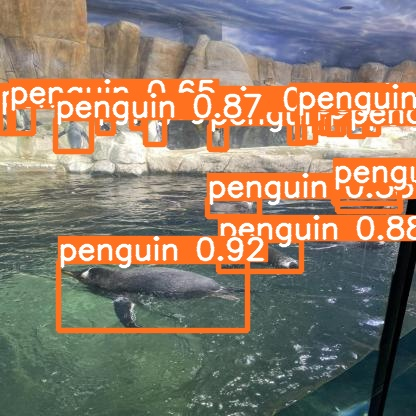

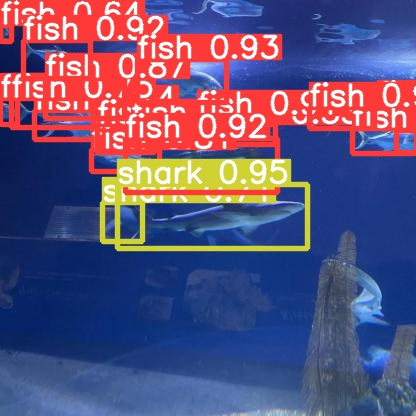

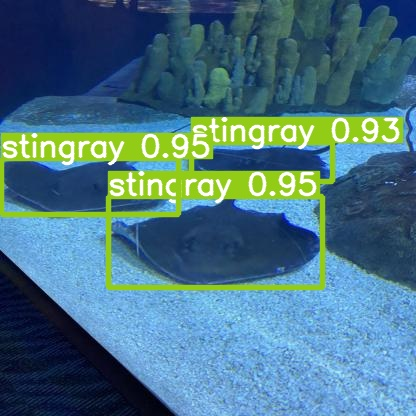

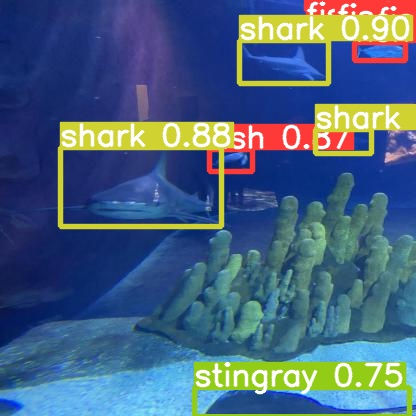

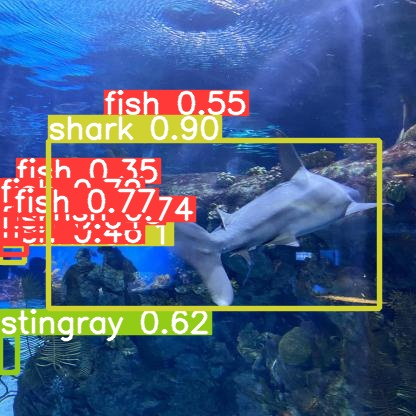

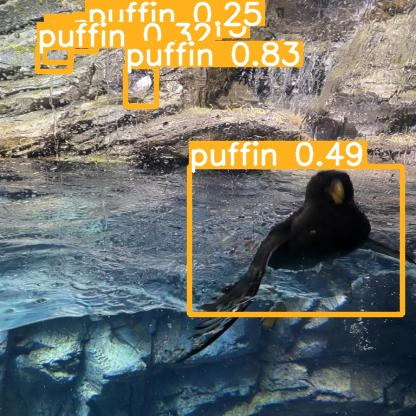

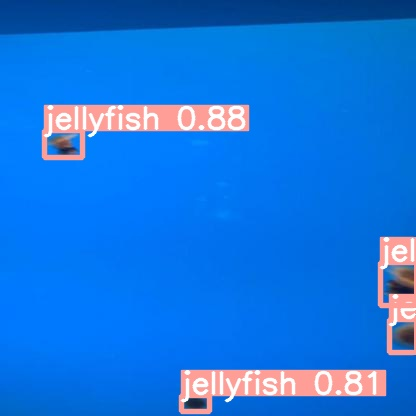

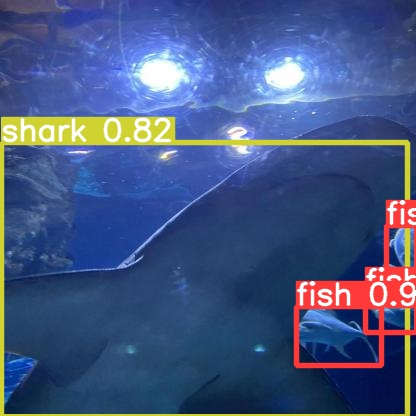

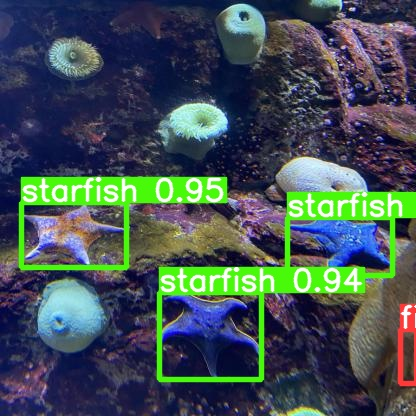

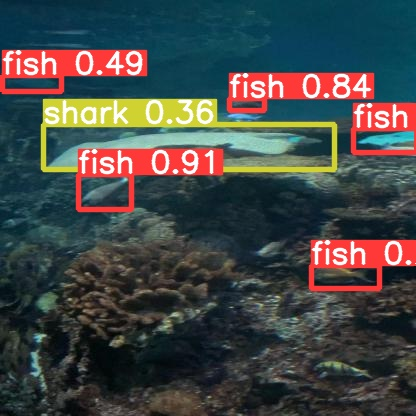

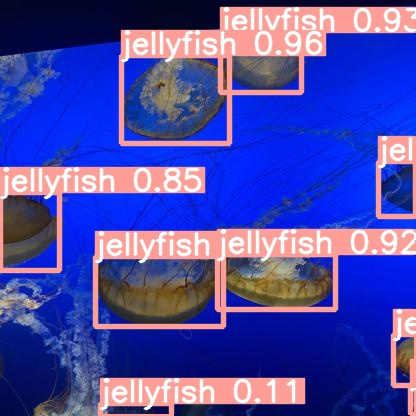

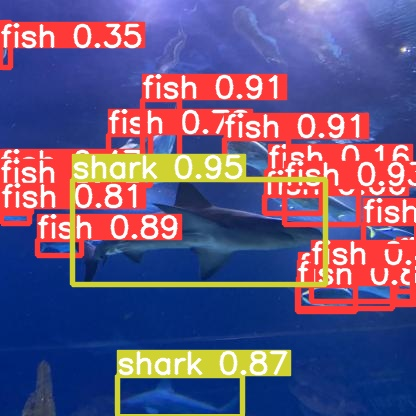

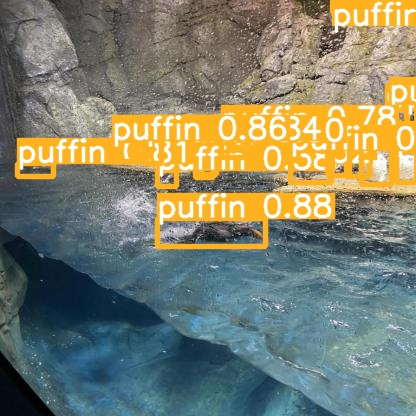

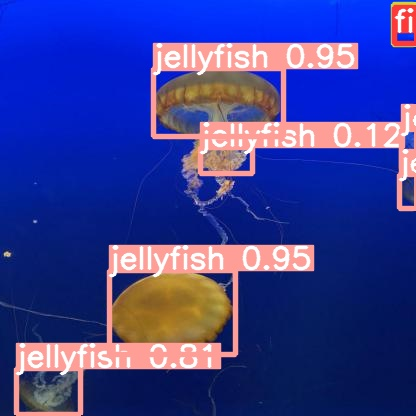

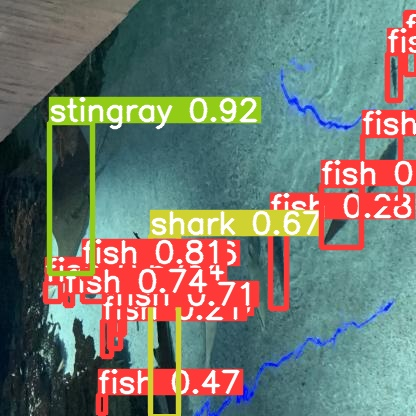

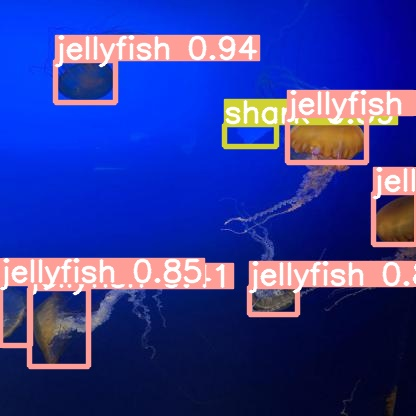

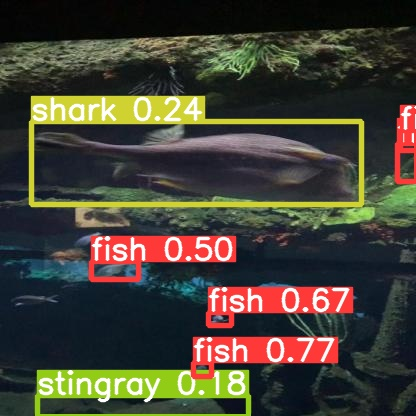

In [8]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [9]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

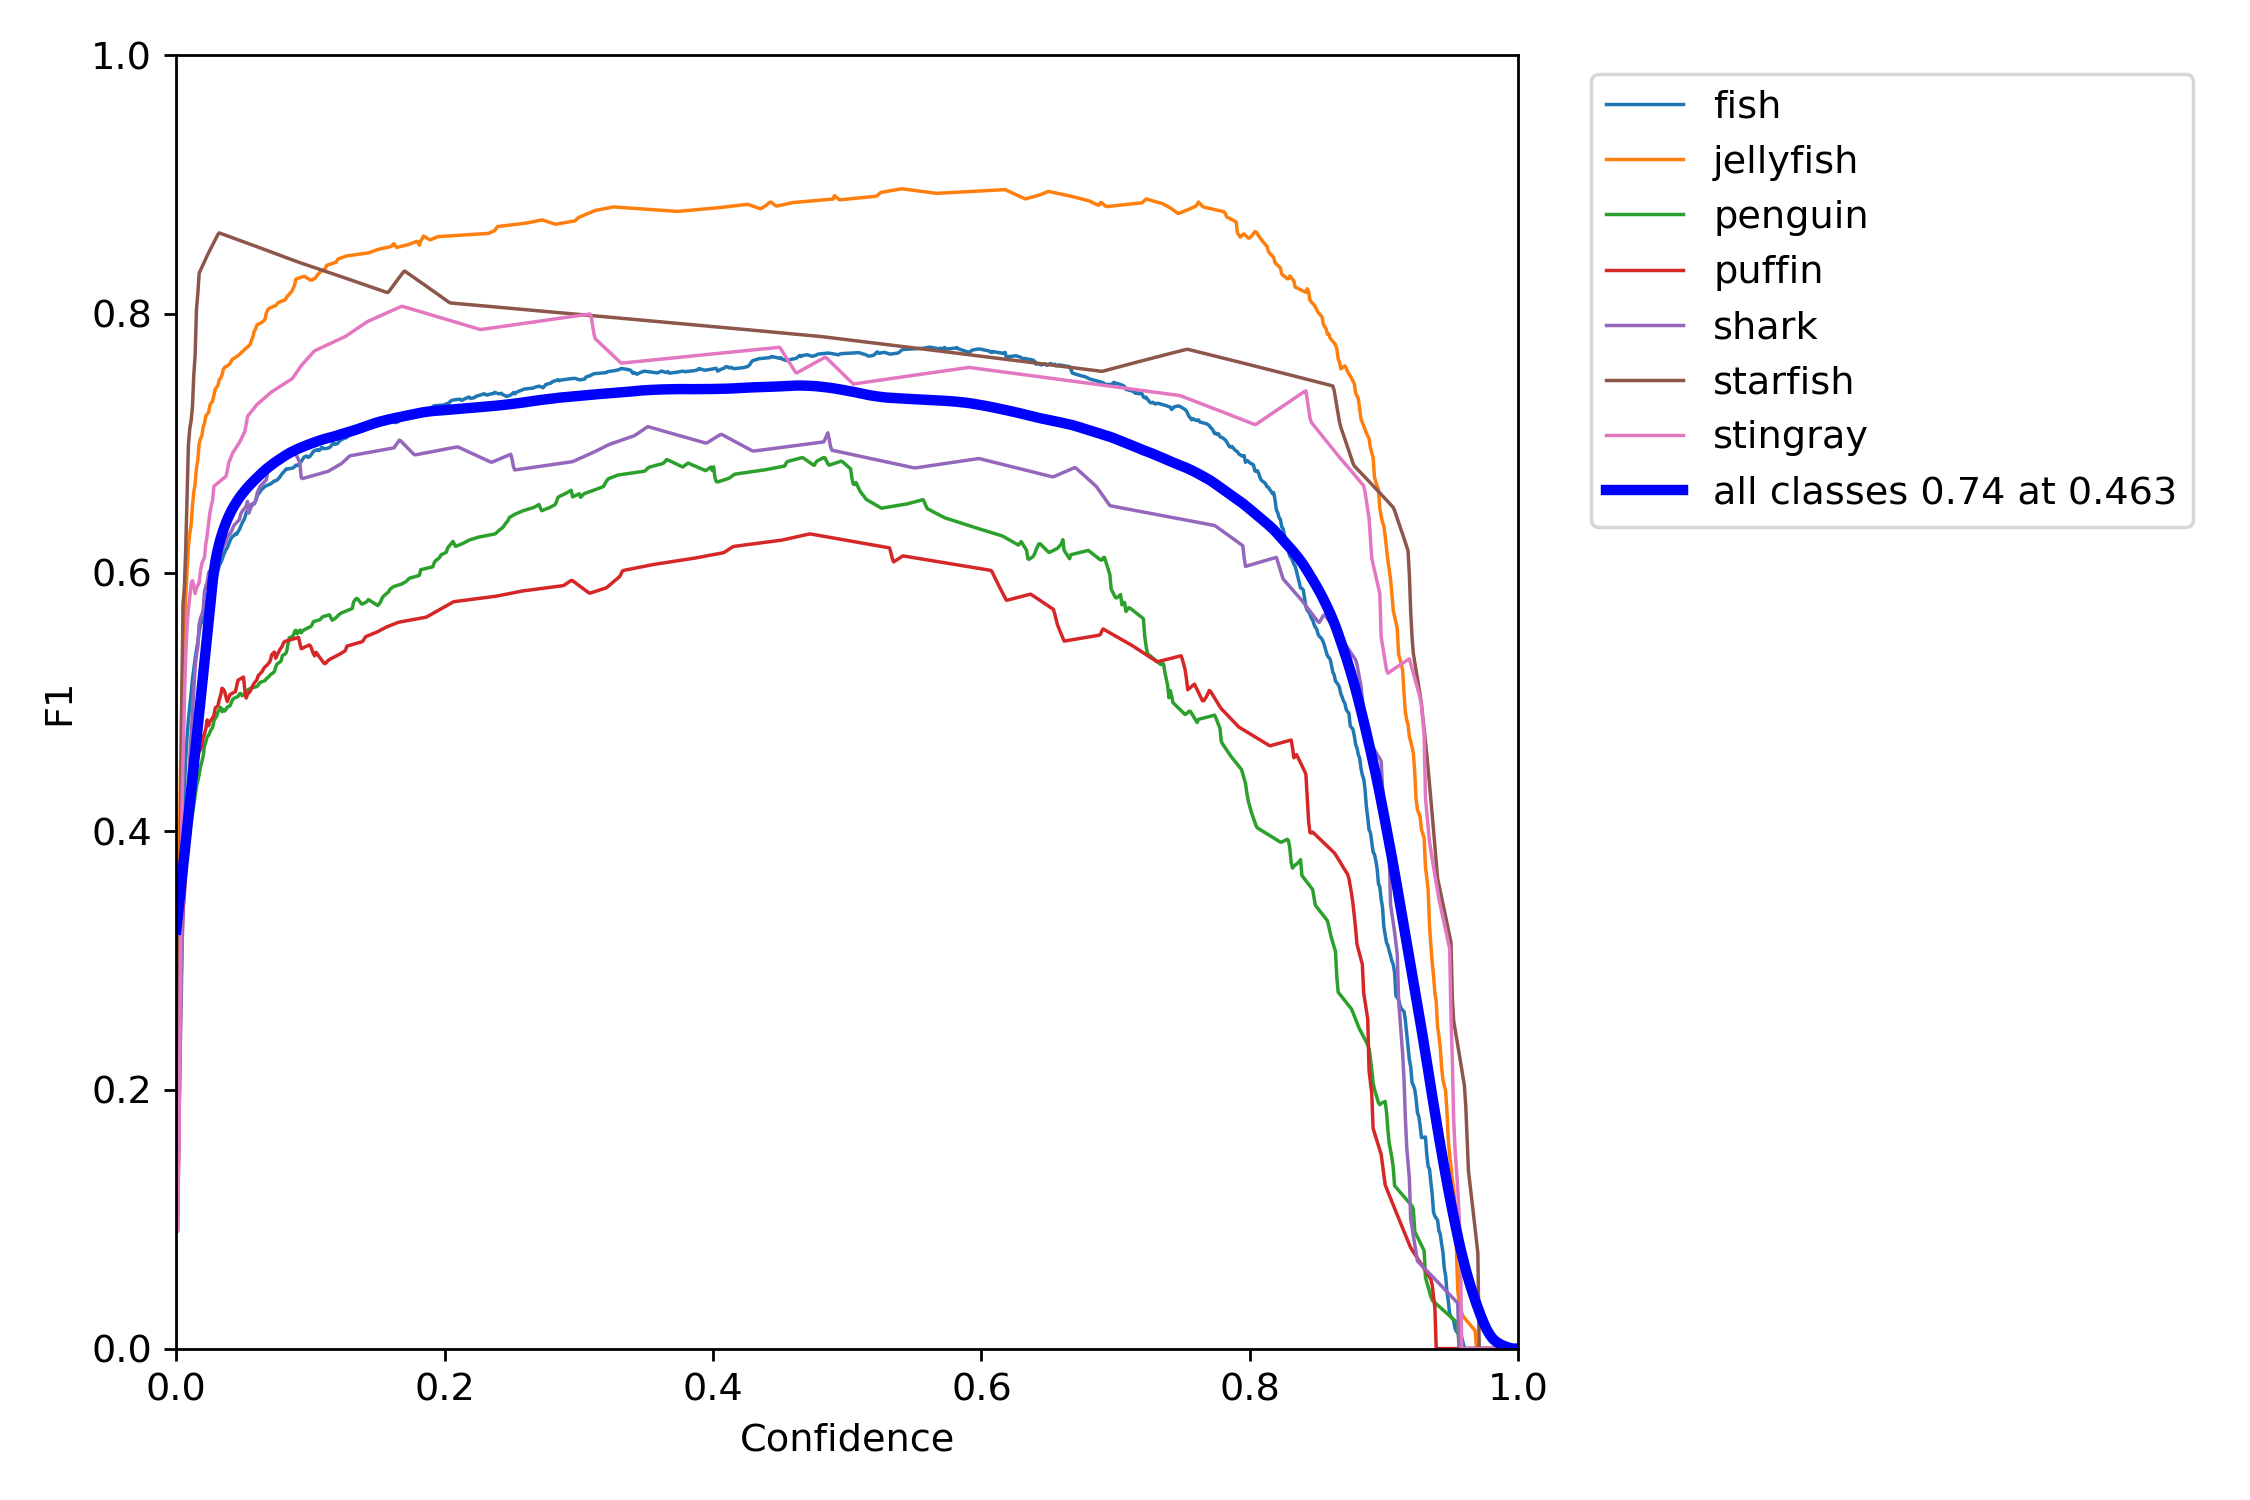

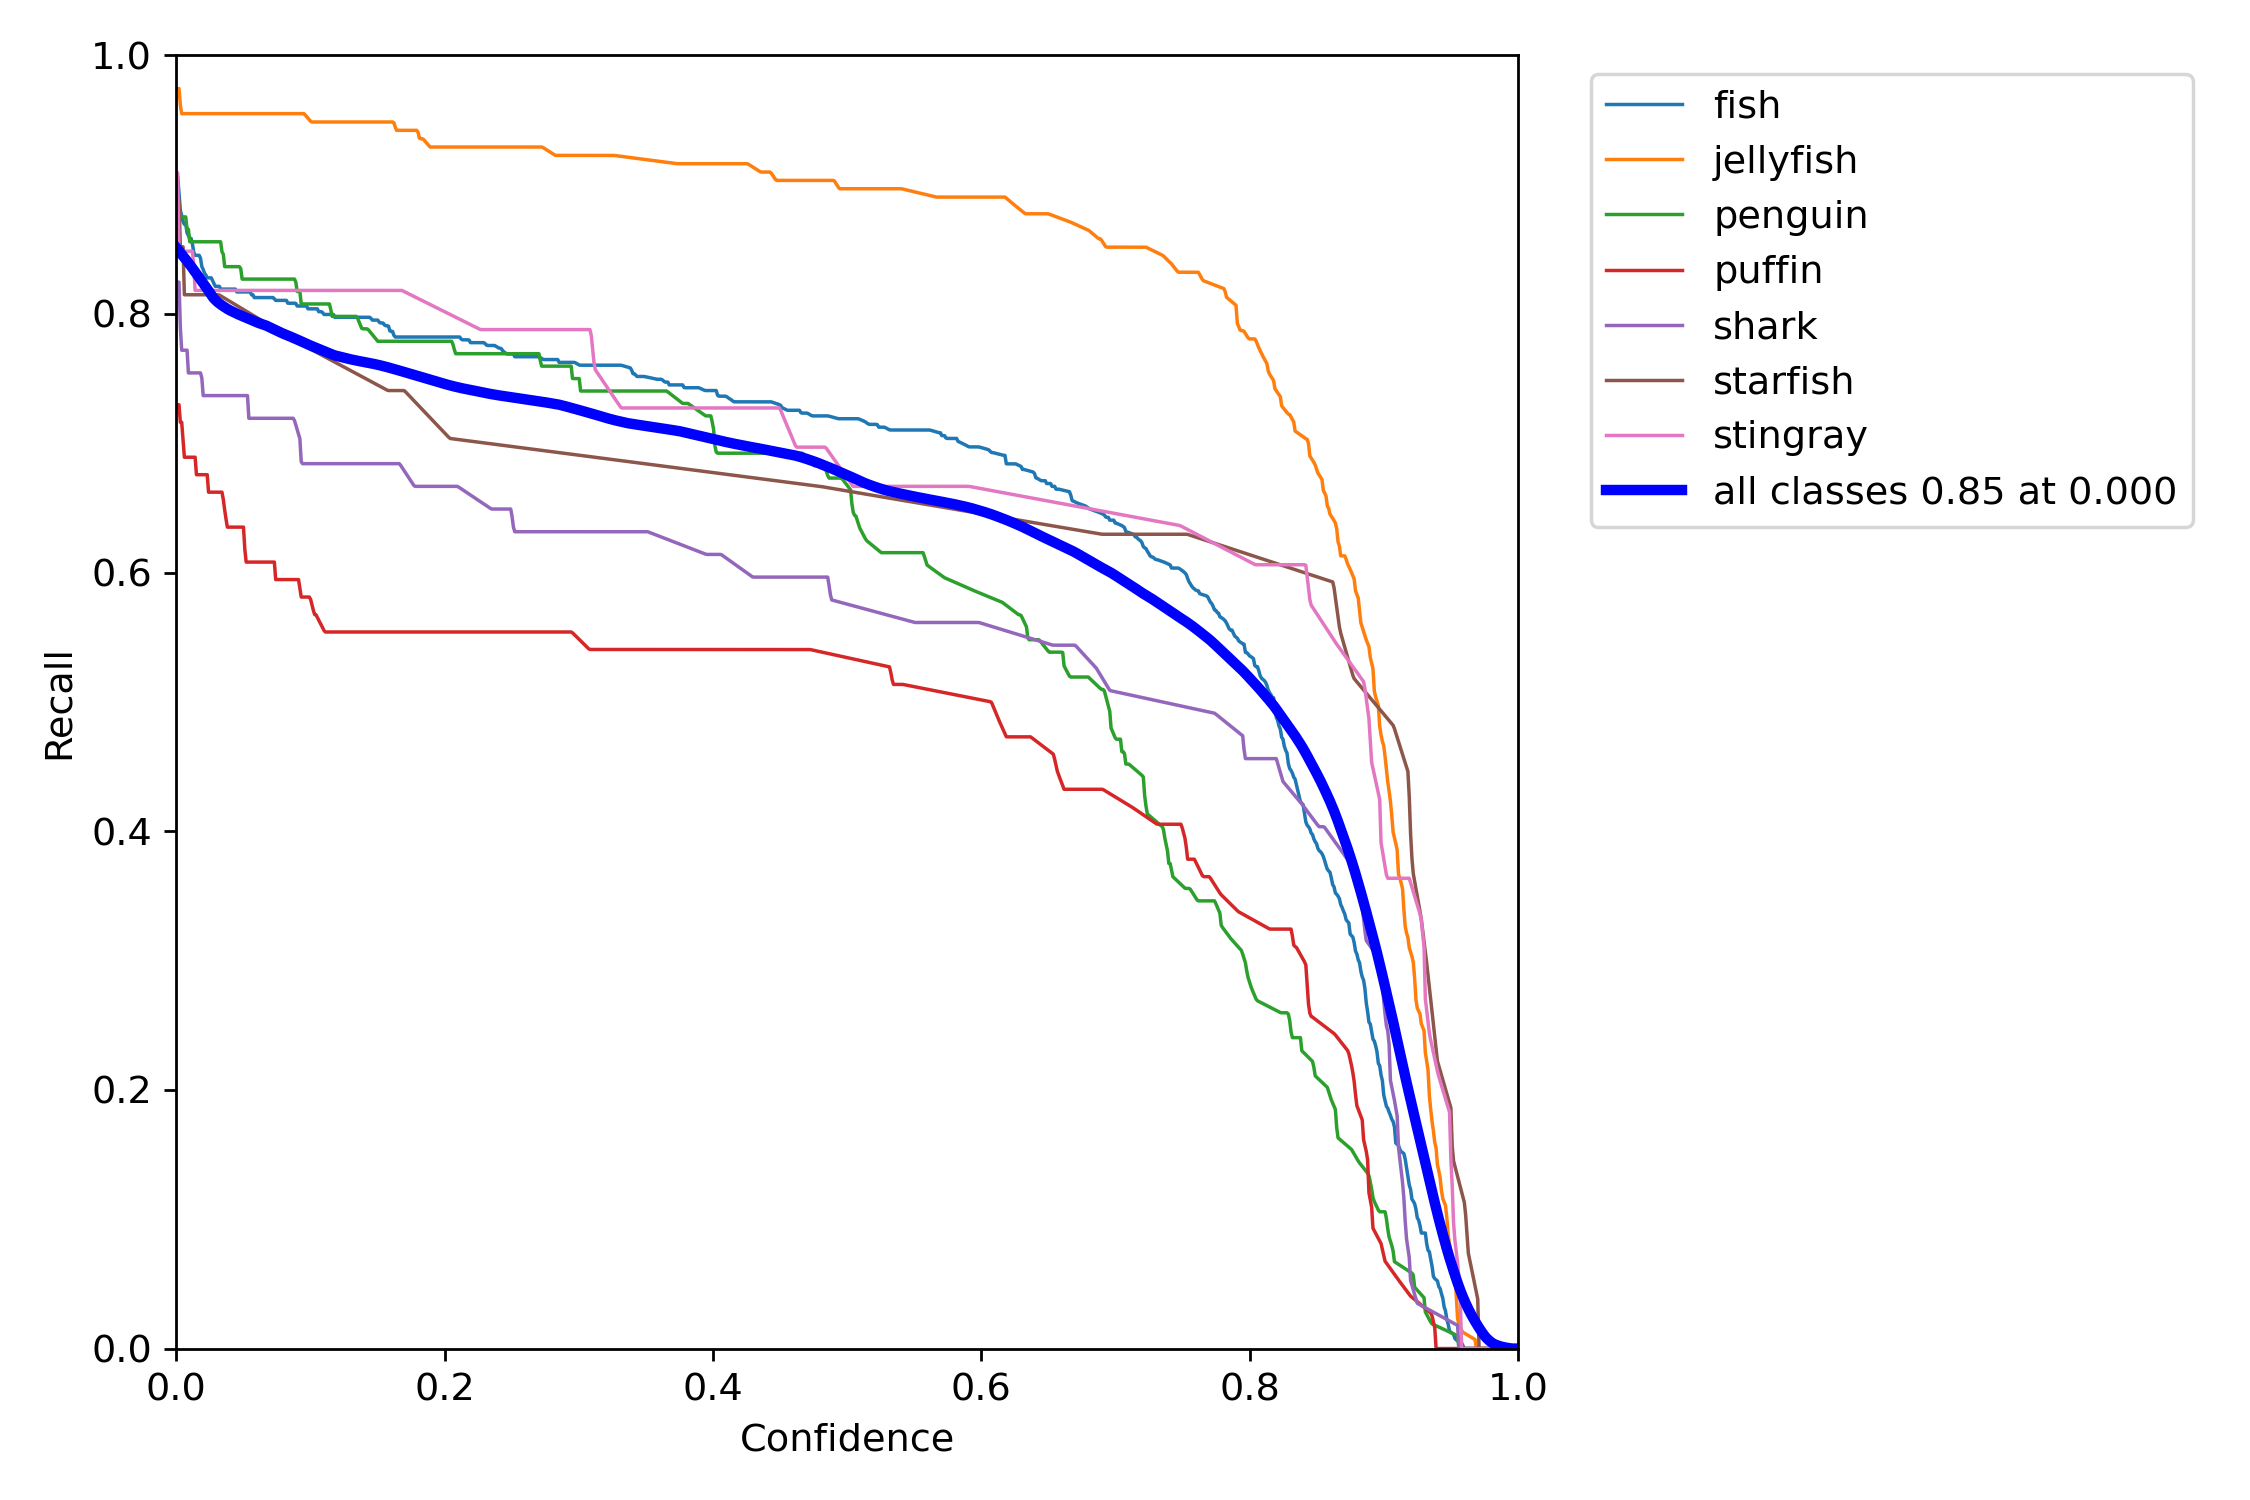

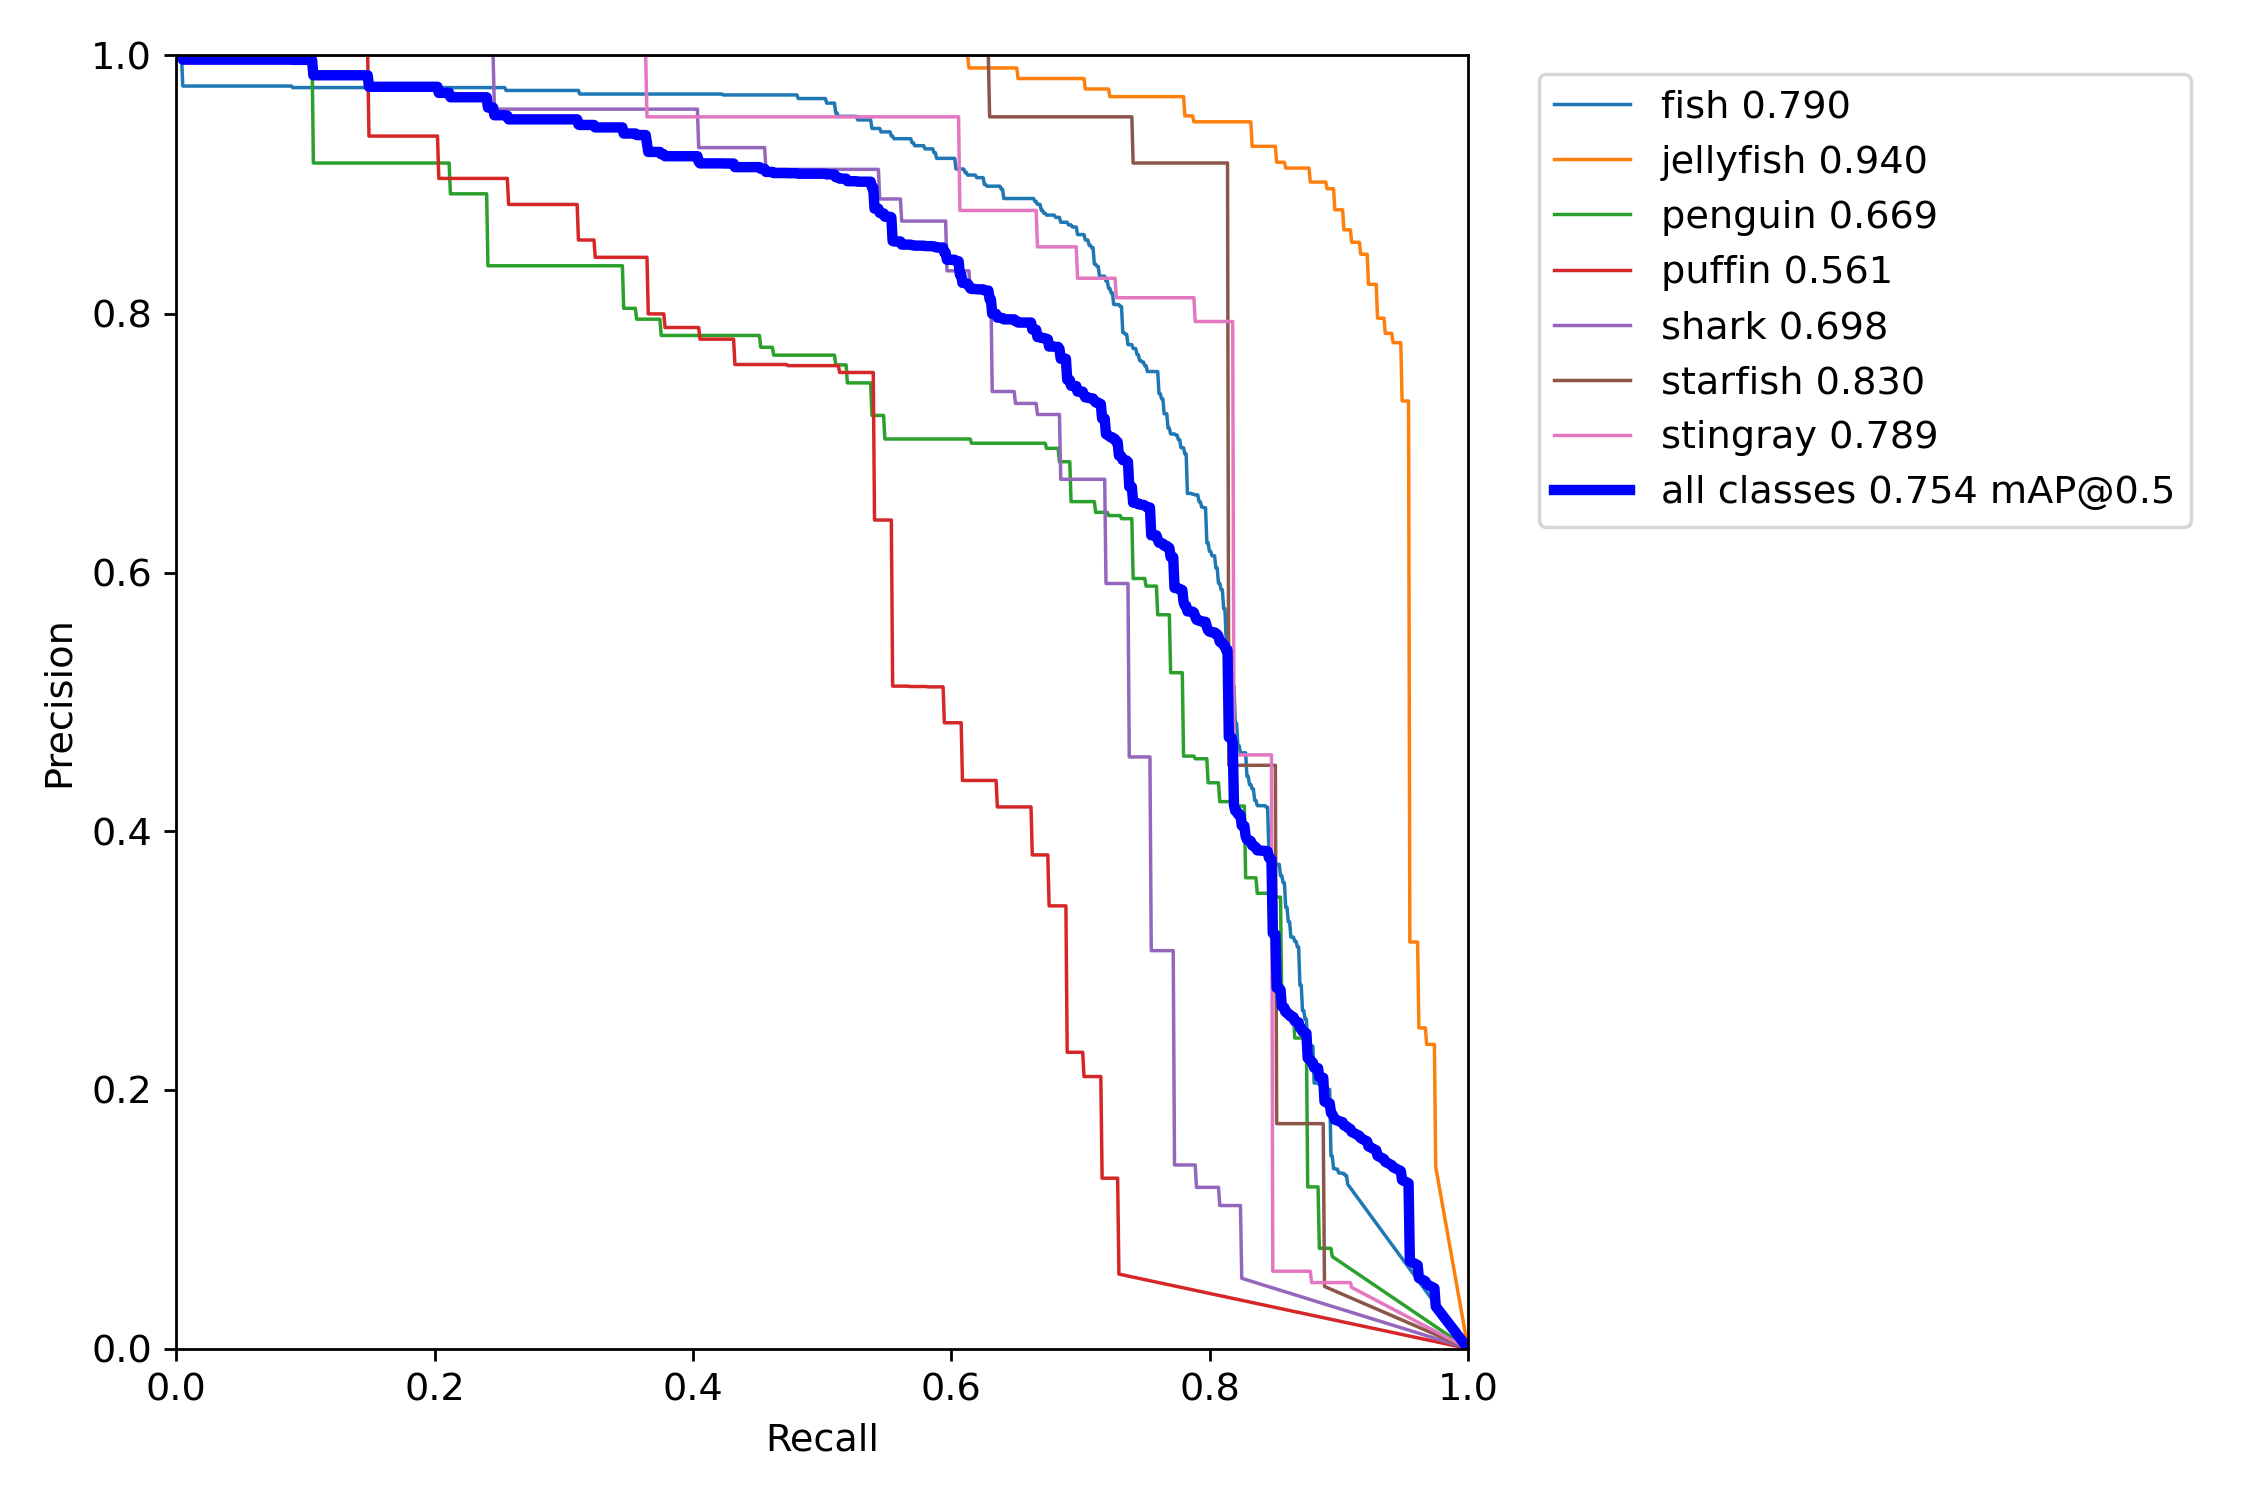

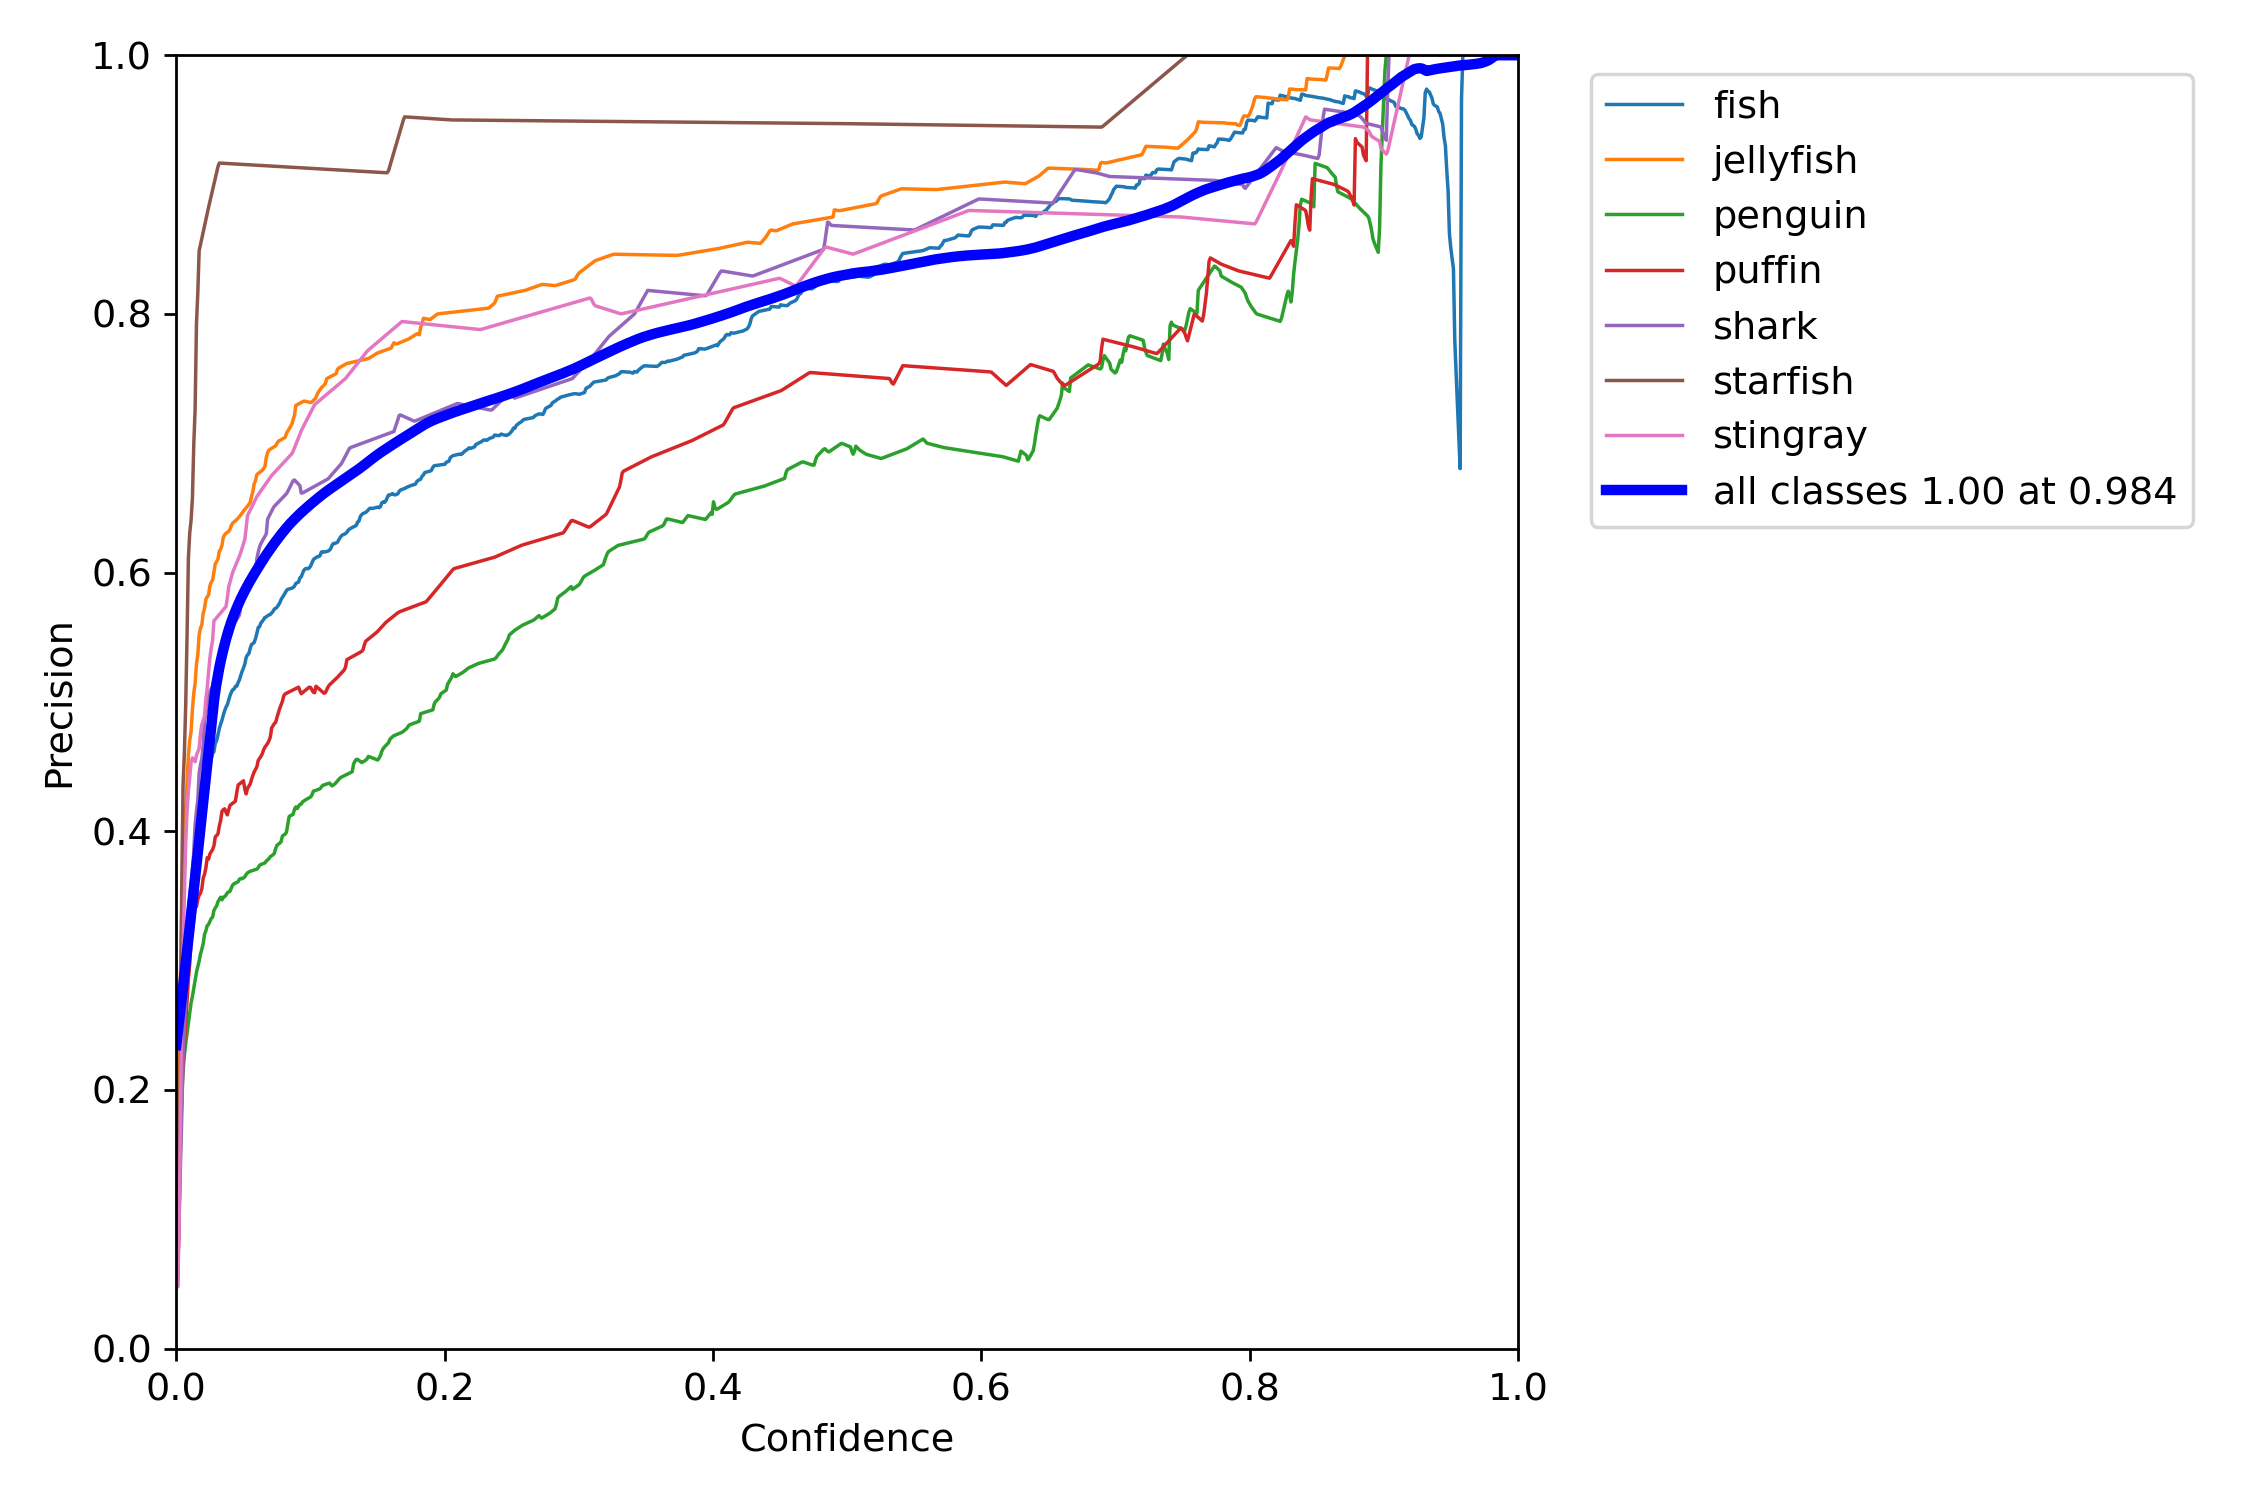

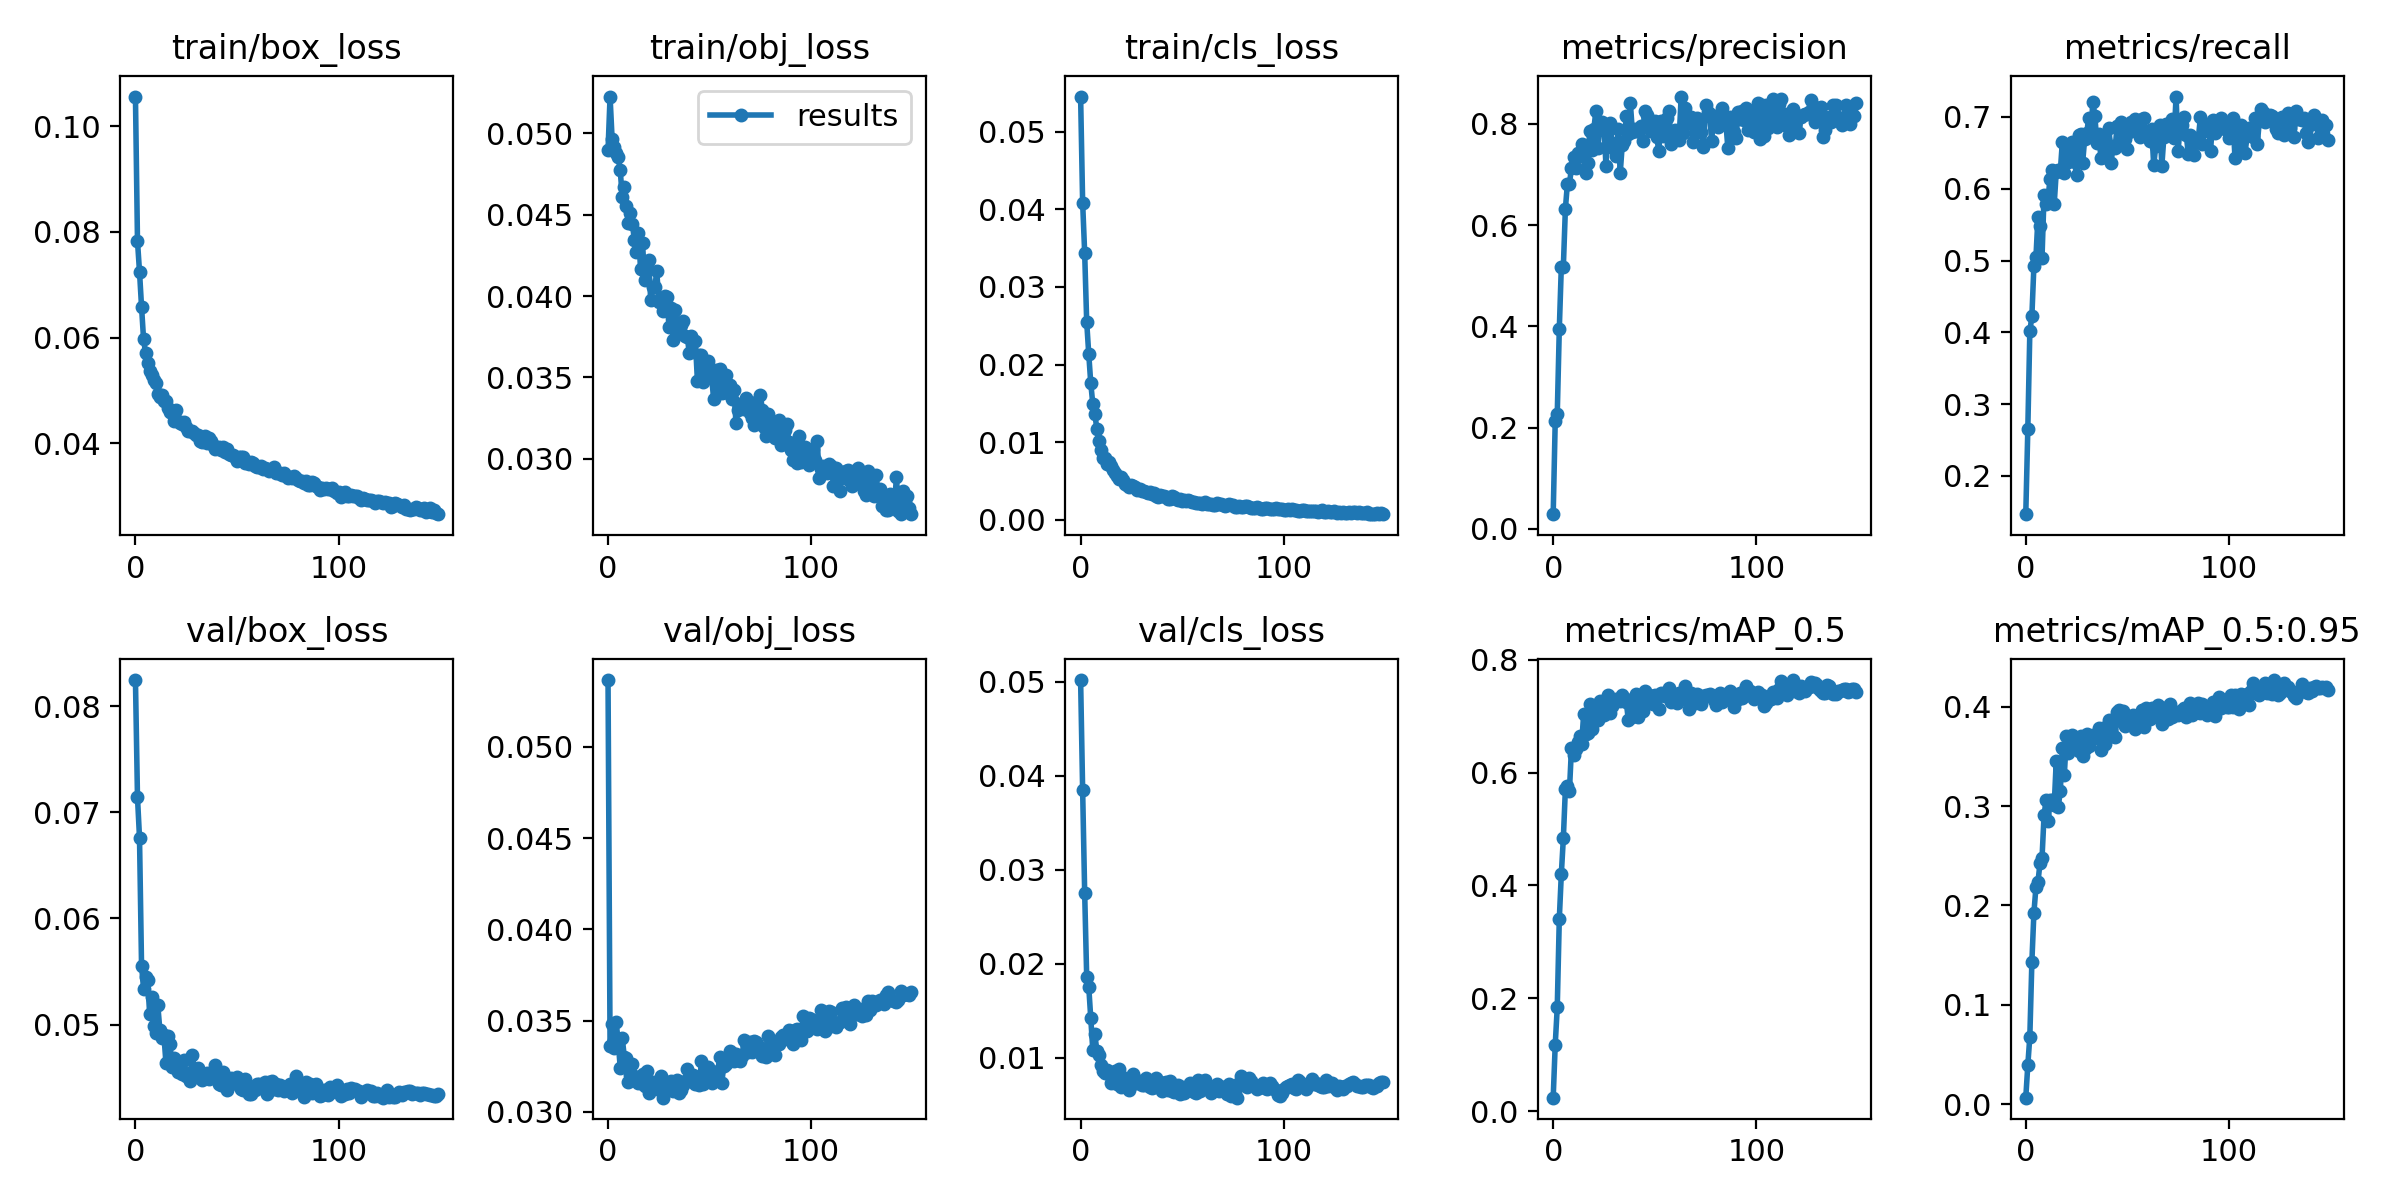

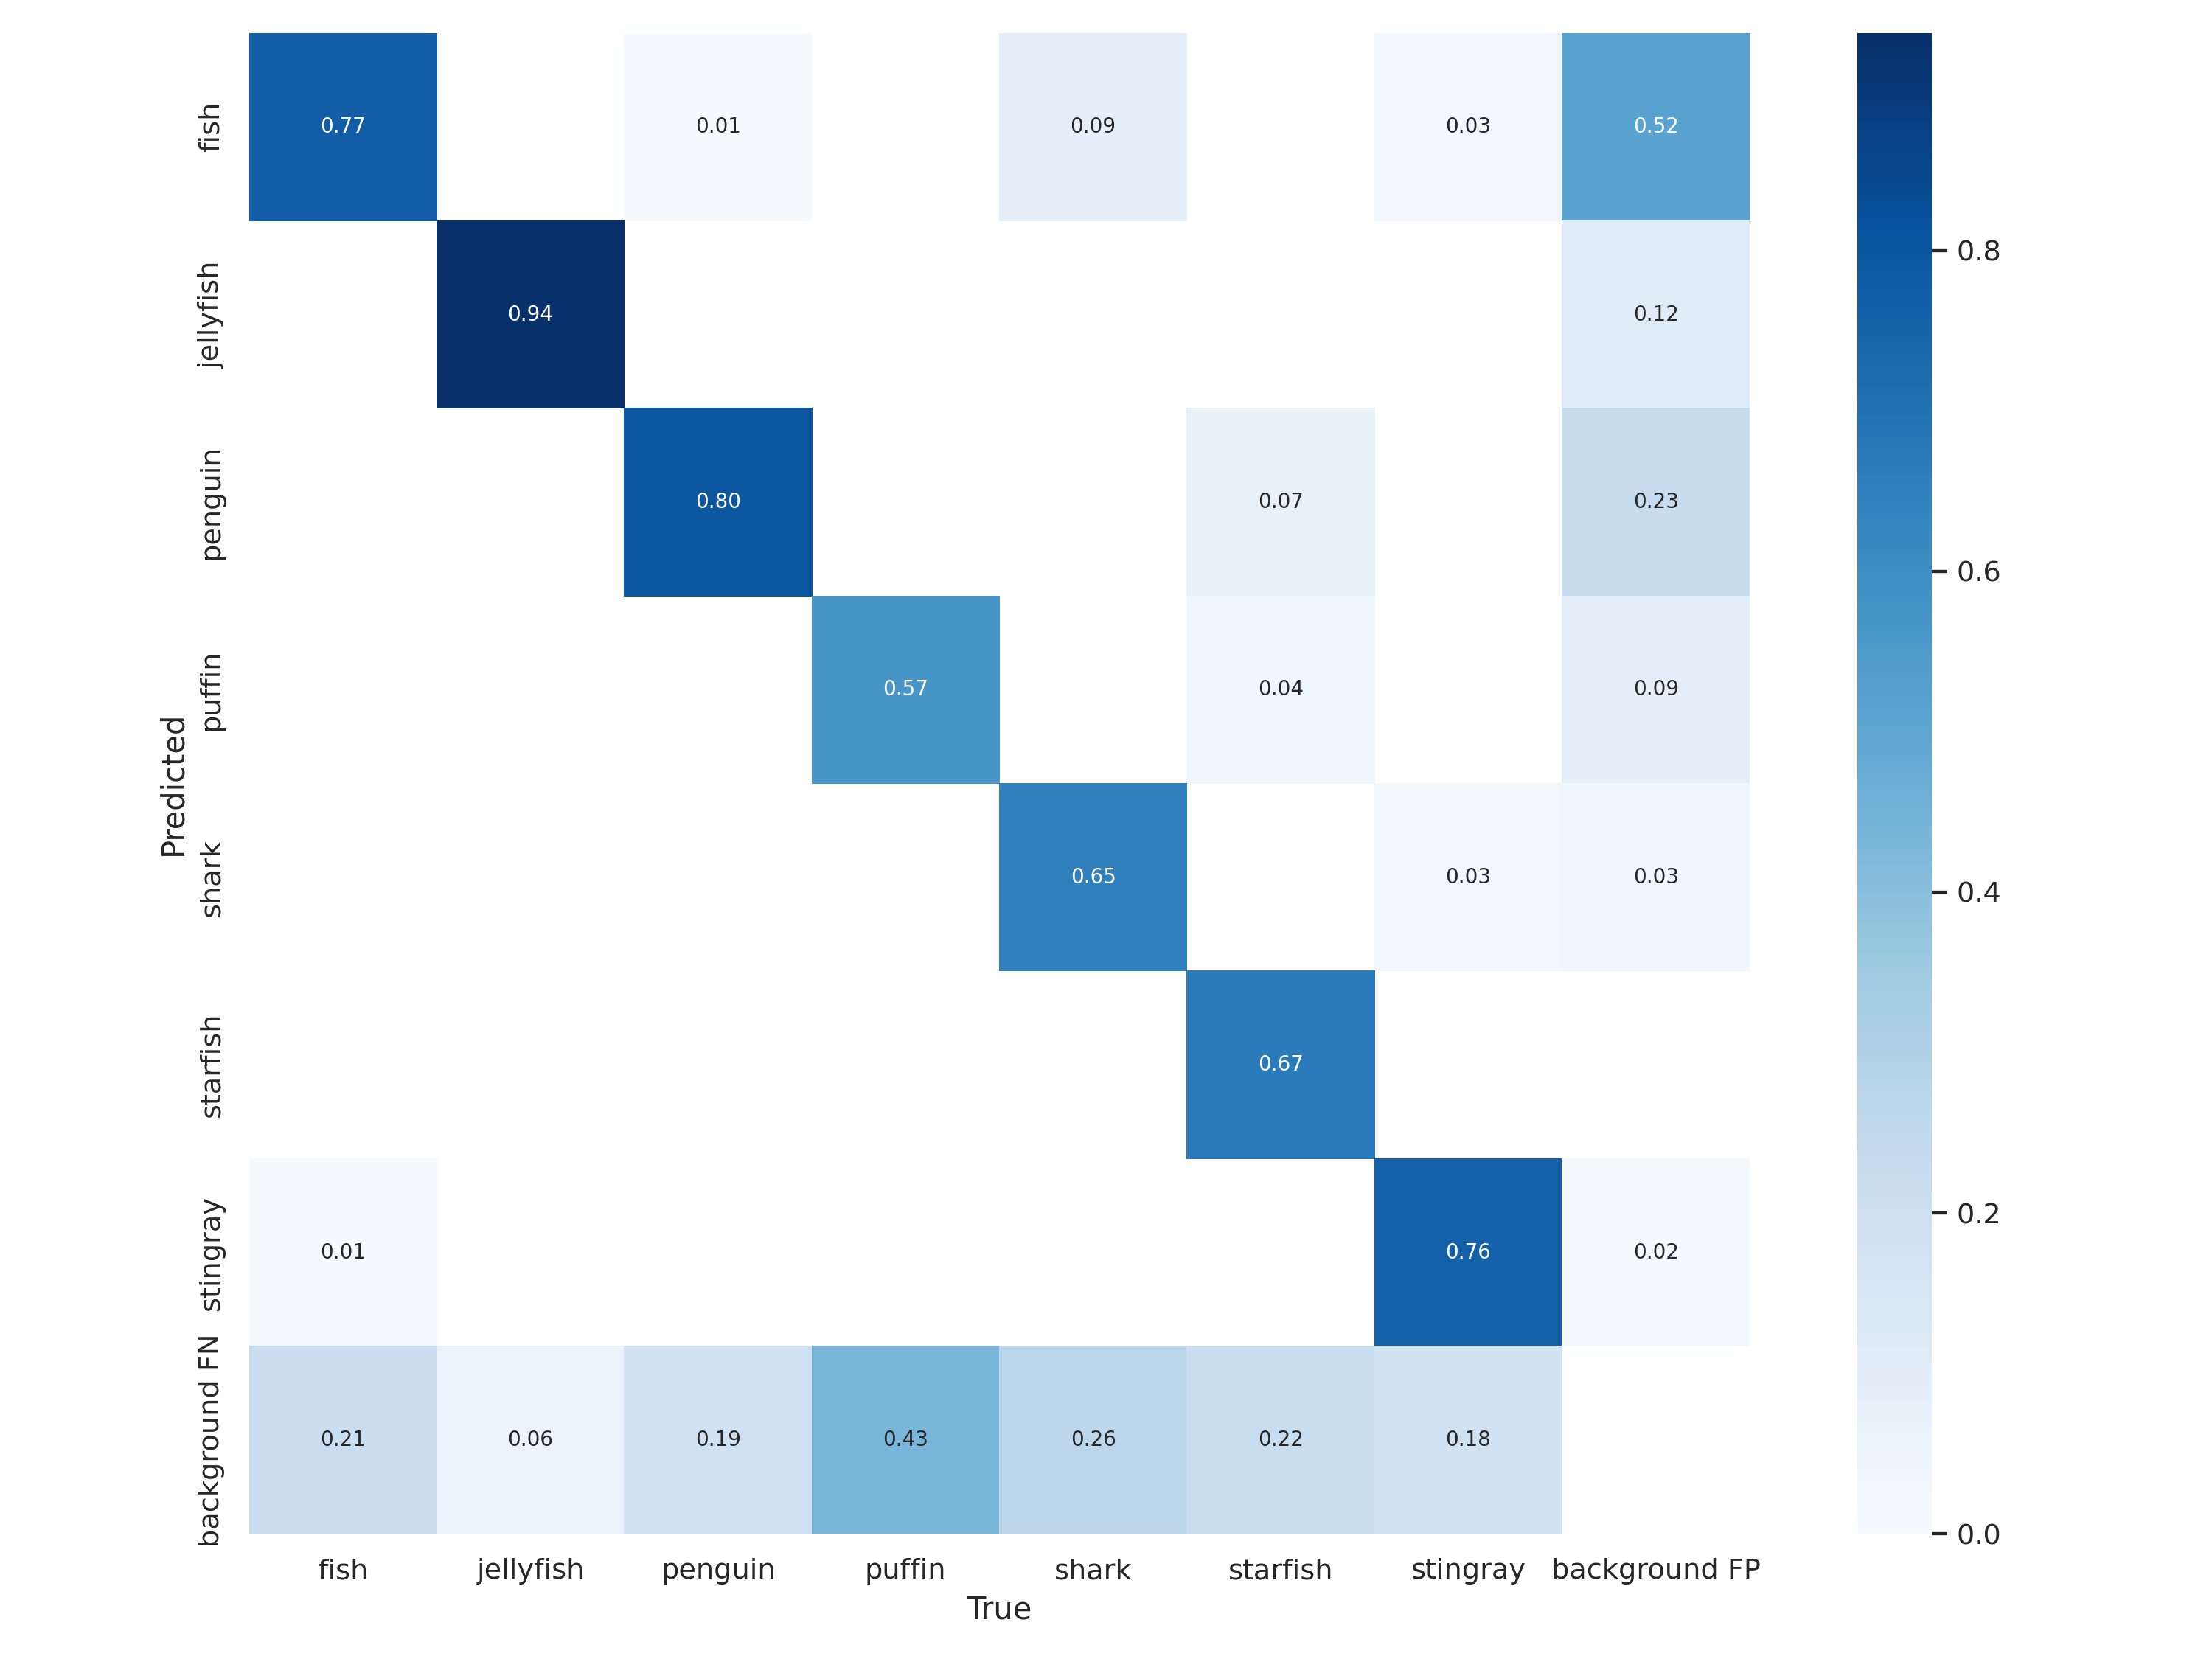

In [13]:
for imageName in glob.glob('/content/yolov5/runs/train/exp/*.png'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")